# SPRINT 08

Antes de empezar quiero aclarar que la técnica que uso de unir los dataframes en uno solo y hacer modificaciones en sus columnas e irlo usando en diferentes ejercicios no sea la mejor practica debido a que se pueden alterar datos que quizás no interese en determinado gráfico, sin embargo, como los ejercicios no requieren gran complejidad y estamos tratando una base de datos con muy pocos datos podemos permitirnos usar esta técnica. Además, ninguno de los datos que se modifican; variables u otros alteran los gráficos siguientes.
También entiendo que si tenemos por ejemplo 5 tablas y vamos usando este data frame combinado en gráficos que solo requieran dos o tres no es la mejor práctica, pero como he dicho creo que el que la base de datos tenga tan poco peso nos permite usar el mismo dataframe en todos.


### CONECTAR A SQL:

Para crear la conexión a mysql requeriremos del conector mysql.connector. He aprovechado de hacerlo en una función para guardarla si es necesario para más adelante.

En este proceso tendremos que indicar el host, usuario y contraseña como también la base de datos que vamos a usar.


In [1]:
import mysql.connector

def create_connection():
    try:
        connection = mysql.connector.connect(
            host='localhost',
            user='root',
            password='itjuanr',
            database='sprint0_4'
        )
        if connection.is_connected():
            print('Conexión exitosa.')
            return connection
    except mysql.connector.Error as e:
        print('Error al conectar a MySQL:', e)
        return None
    

### Crear Una funcion para facilitar consultas

Ahora crearemos una función para hacer consultas y para cerrar la conexión, así no requerirá un bloque de código extenso cada vez que queramos hacer una consulta en la base de datos. Recuerdo que con tal de poder manipular la base de datos y crear los data frames requeriremos la librería Pandas que nos proporciona herramientas adecuadas.

Para ello necesitamos crear un cursor que nos permite "interactuar" con la base de datos, establecemos el cursor a la conexión existente. Luego a través del método "execute" ejecutamos la consulta que definiremos posteriormente. La línea siguiente es un bucle para iterar entre las diferentes columnas y posteriormente se guardarán sus datos en la variable resultado.

Luego indicamos que los resultados y sus columnas se crearan como dataframe y posteriormente estos se almacenaran en un diccionario "data_dict" donde "table_name" es el nombre de la tabla como llave.

El resto del código es un tratamiento básico de gestión de error.

De la misma manera creamos una función para la desconexión del cursor (cerrar la conexión) por seguridad y optimización.

Quiero destacar que sé que para este ejercicio todos estos pasos no son necesarios ya que solo ejecutamos una consulta. Sin embargo, este bloque de código me puede servir para más adelante y así no tener que crear uno nuevo en cada proyecto donde si pueda requerir crear consultas sucesivamente.


In [2]:
import pandas as pd

def ejecutar_consulta(connection, consulta, table_name, data_dict):
    try:
        cursor = connection.cursor()
        cursor.execute(consulta)
        columnas = [i[0] for i in cursor.description]
        resultados = cursor.fetchall()
        df = pd.DataFrame(resultados, columns=columnas)
        data_dict[table_name] = df
    except mysql.connector.Error as e:
        print('Error al ejecutar la consulta:', e)
    finally:
        if cursor is not None:
            cursor.close()

def cerrar_conexion(connection, cursor=None):
    if cursor is not None:
        cursor.close()
    if connection is not None and connection.is_connected():
        connection.close()

### Crear un DataFrame General (no siempre es recomendable, en este caso, lo haremos asi)

Para crear el data frame, crearemos uno para cada tabla en un diccionario donde cada tabla será una llave y sus valores serán sus datos. En data_dict será el diccionario que almacenará todos los datos, como ya hemos explicado anteriormente. para no hacer una consulta por tabla lo haremos en un bucle para ahorrar tiempo finalmente cerramos la conexión e imprimimos cada tabla.

In [3]:

connection = create_connection()


data_dict = {}

tablas = ['products', 'transactions', 'user', 'companies']

try:
    for tabla in tablas:
        consulta = f"SELECT * FROM {tabla};"
        ejecutar_consulta(connection, consulta, tabla, data_dict)
finally:
    cerrar_conexion(connection)

for table_name, df in data_dict.items():
    print(f"Tabla: {table_name}")
    print(df.head())



Conexión exitosa.
Tabla: products
   id            product_name  price   colour  weight warehouse_id
0   1        Direwolf Stannis    161  #7c7c7c     1.0         WH-4
1   2             Tarly Stark      9  #919191     2.0         WH-3
2   3  duel tourney Lannister    171  #d8d8d8     1.5         WH-2
3   4       warden south duel     72  #111111     3.0         WH-1
4   5          skywalker ewok    171  #dbdbdb     3.2         WH-0
Tabla: transactions
                                     id   card_id business_id  \
0  02C6201E-D90A-1859-B4EE-88D2986D3B02  CcU-2938      b-2362   
1  0466A42E-47CF-8D24-FD01-C0B689713128  CcU-4219      b-2302   
2  063FBA79-99EC-66FB-29F7-25726D1764A5  CcU-2987      b-2250   
3  0668296C-CDB9-A883-76BC-2E4C44F8C8AE  CcU-3743      b-2618   
4  06CD9AA5-9B42-D684-DDDD-A5E394FEBA99  CcU-2959      b-2346   

            timestamp  amount  declined    product_ids  user_id        lat  \
0 2021-08-28 23:42:24  466.92         0      71, 1, 19       92  81.918459 

Usaremos merge para unir las tablas y usarlas en algun ejercicio que requeriran las union de estas.

In [4]:
df_general = pd.merge(data_dict['transactions'], data_dict['user'], left_on='user_id', right_on='id', suffixes=('_transaction', '_user'))
df_general = pd.merge(df_general, data_dict['companies'], left_on='business_id', right_on='comapny_id')

### Instalamos (a traves de la consola con pip) e importamos las librerias matplot, seaborn, numpy y plotly

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

## Nivel 1

### Ex01 - Una variable numèrica.

Primero creamos con plt.figure el tamaño del cuadro.

Luego usaremos seaborn para crear el gráfico, en este caso, usaremos un histograma sobre la columna amount de la tabla transactions. podemos usar los parámetros kde y bins para definir una línea de tendencia, así como la cantidad de barras.

Para finalizar, definimos los nombres de los ejes x e y con maplot xlabel, además para hacer más clara la visualización usaremos xtics para definir los valores del eje X



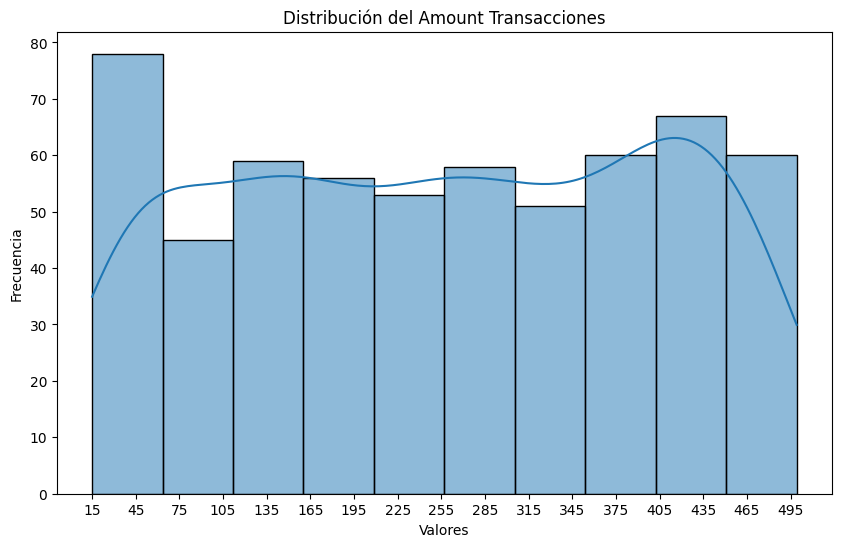

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data_dict['transactions']['amount'], kde=True, bins=10)
plt.title('Distribución del Amount Transacciones')
plt.xlabel('Valores')
plt.xticks(np.arange(min(data_dict['transactions']['amount']), max(data_dict['transactions']['amount'])+1,30))
plt.ylabel('Frecuencia')
plt.show()

Podemos observar en el resultado que el rango que más transacciones tiene es entre 15-60 € con 79 transacciones aproximadamente sin embargo esto no representa una gran ganancia con respecto a los demas rangos, donde el gran grueso de ganancias está en el rango 400-450€.

Pese que a bajos valores de transacciones son más frecuentes, gran parte de los beneficios vienen de la mayor venta por transacciones.


### Ex02 - Dues variables numèriques

Como el ejercicio anterior, usaremos matplot para definir el cuadro del gráfico y seaborn para crear la visualización. en este caso usaremos un gráfico de dispersión. usaremos la tabla "products" con las columnas precio y peso para ver si hay una relación en nuestros productos sobre su peso y precio.

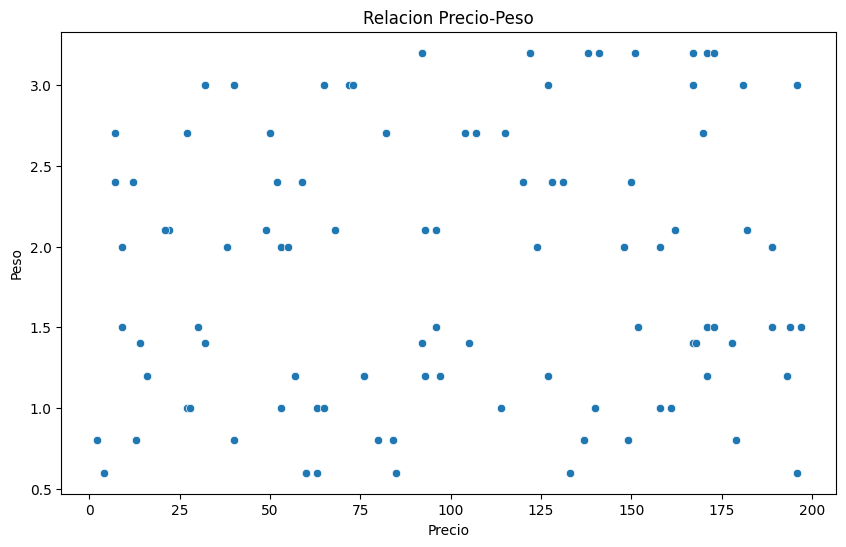

In [7]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='weight', data=data_dict["products"])
plt.title('Relacion Precio-Peso')
plt.xlabel('Precio')
plt.ylabel('Peso')
plt.show()


Como podemos ver a simple vista, está repartido los valores de ambas variables. esto quiere decir que no hay una relación directa entre a mayor o menor peso más o menos precio. Sin embargo, si podemos observar que hay un pico de los productos más caros suelen ser menos pesados.

### Ex03 - Una variable categòrica

Con tal de no ser repetitivo en la explicación de cada gráfico, solo indicaré aquellos que haga de forma diferente, hasta ahora continuamos con la misma dinámica con seabron y matplot.

En este caso crearemos un gráfico de barras para contabilizar los usuarios de cada país.
Al gráfico le añadiremos con bar_laberl la etiqueta de cada columna


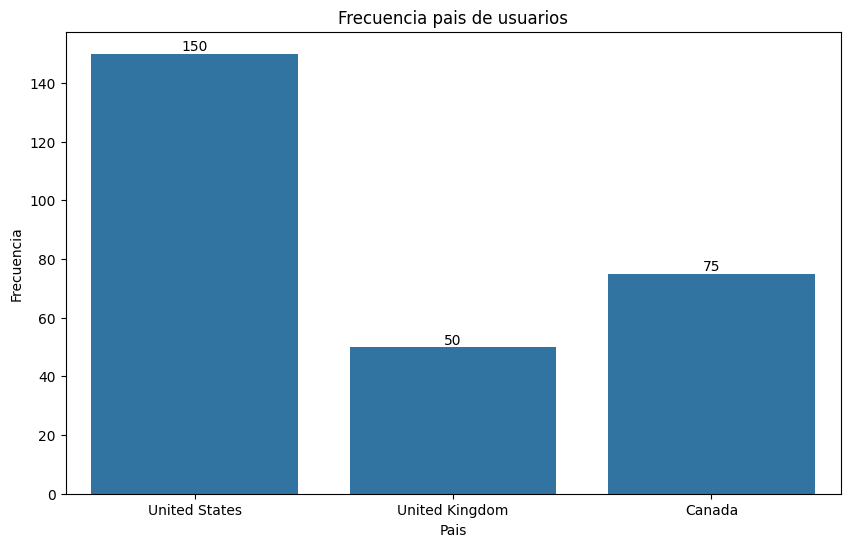

In [8]:
plt.figure(figsize=(10, 6))


ax = sns.countplot(x='country', data=data_dict["user"])
ax.bar_label(ax.containers[0])

plt.title('Frecuencia pais de usuarios')
plt.xlabel('Pais')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()




En este caso vemos como la mayoria de usuarios son de Estados unidos, seguido por Canadá con la mitad de estos.

Podemos deducir que las campañas de captación de clientes pueden funcionar mejor en Estados Unidos, así que sería conveniente mejorar la del resto de países para captar más clientes.

también añadir como veremos posteriormente, aunque el grueso de usuarios sea estadounidense, La mayor parte de nuestros ingresos proviene de Canadá.


### Ex04 - Una variable categòrica i una numèrica.

Aquí seguiremos el mismo procedimiento, con la diferencia que tendremos que hacer un merge (join) de dos tablas con tal de poder crear el gráfico deseado entre el pais de las compañías y el amount de las transacciones.

Como ya lo hemos preparado anteriormente simplemente usamos el dataframe "df_general" donde hay los joins correspondientes.

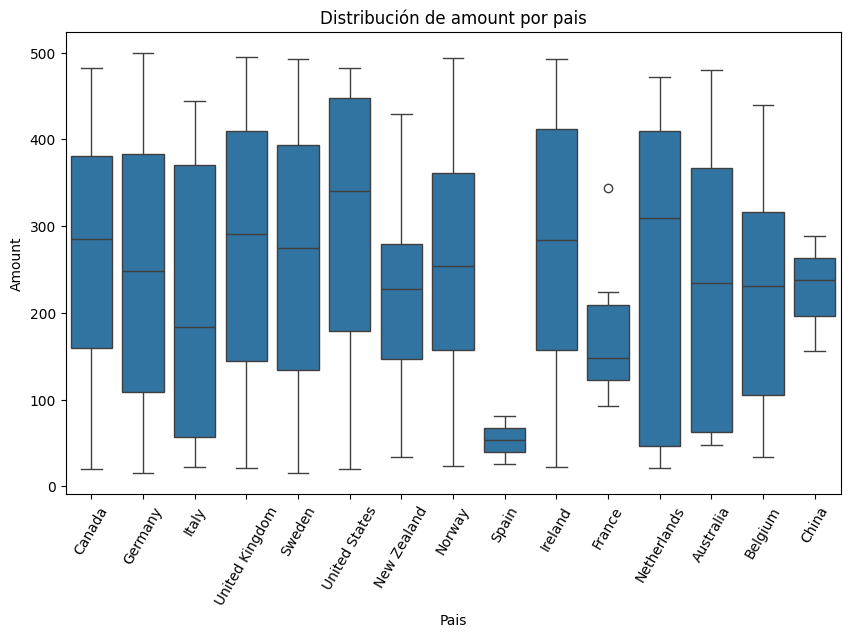

In [9]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='country_company', y='amount', data=df_general)
plt.title('Distribución de amount por pais')
plt.xlabel('Pais')
plt.ylabel('Amount')
plt.xticks(rotation=60)
plt.show()


En esta ocasión, vemos como las empresas de Estados Unidos, en cabeza seguidas de Holanda, Irlanda y U.K son las empresas con mayor variabilidad, sus rangos se extienden entre los 150 (180 para Estados Unidos) y los 400 ( casi 450 para estados unidos). Esta variabilidad nos indica dinamismo o competencia en el mercado.

La mediana en todas las empresas menos en España y Francia se mantiene cerca de los 250. unos 50 y 150 para España y Francia.
respectivamente.

Tambien como dato adicional vemos que no tienen valores atípicos excepto Francia.



### Ex05 - Dues variables categòriques.

En este caso he querido usar la librería de plotly previamente importada e instalada con tal de probar nuevas visualizaciones dinámicas. En esta visualización se puede interactuar con cada grupo dándonos los datos correspondientes.

Creando una variable asignamos el gráfico que queramos, en este caso un treemap "px.treemap" con los datos y el titulo que queramos.

En nuestro caso hemos creado un treemap sobre los países usuarios y sus respectivos usuarios según el rango de edad.


In [10]:

fig = px.treemap(data_dict['user'], path=['country', 'rango_edad'], title='Distribución de Usuarios por País y Rango de Edad')


fig.show()




Estados Unidos: Su mayoria de usuarios, 74/150 se encuentran entre los 30-39 años seguido de +40 con 43/150 y por ultimo los más jóvenes con 33/150 de entre 20-29 años 

Canadá: Su mayoria de usuarios, 39/75, se encuentran entre los 30-39 años seguido de la franja de 20-29 con 20/75 y por ultimo los de más de 40 con 16/75

United Kingdom: Su mayoria de usuarios, 25/50(la mitad) se encuentran entre los 30-39 años seguido del rango de 20-29 años con 18/50 y por ultimo los mayores de 40 con 7/50

En todos los casos vemos como la franja de 30-39 es la más poblada en los tres países, solo estados unidos difieren del patrón siendo los de 40 los segundos más poblados.
Esto podría darnos una idea de que productos invertir o potenciar para estos rangos de personas, así como se puede también hacer una visualización añadiendo el monto total de cada rango.


### Ex06 - Tres variables.

Ahora crearemos una visualización donde el gasto de los países de origen de usuario a traves del tiempo, en concreto para este ejercicio he querido filtrarlo para el año 2021 únicamente.

Para esto uniremos las tablas user y transacciones con tal d poder coger las columnas country de user, amount y timestamp de transactions.

La columna de timestamp la transformaremos a un formato de fecha para asegurarnos de que todos los valores son accesibles, además ordenaremos los valores por fecha.

Con tal de obtener los valores de una suma acumulativa por pais a traves del tiempo usaremos ".cumsum".
(df_ex05['amount_cumsum'] = df_ex05.groupby('country')['amount'].cumsum())

Luego definiremos dos variables como fecha de inicio y fecha final para poder filtrar nuestro dataframe en la franja deseado, en nuestro caso todo el año 2021.

Luego usamos las variables para filtrar nuestro dataframe.

df_filtrado_fecha = df_ex05.loc[(df_ex05['timestamp'] >= fecha_inicio) & (df_ex05['timestamp'] <= fecha_fin)]

Luego crearemos el gráfico como venimos haciendo hasta ahora, usaremos un gráfico de líneas y a traves del parámetro hue establecemos los países como una variable





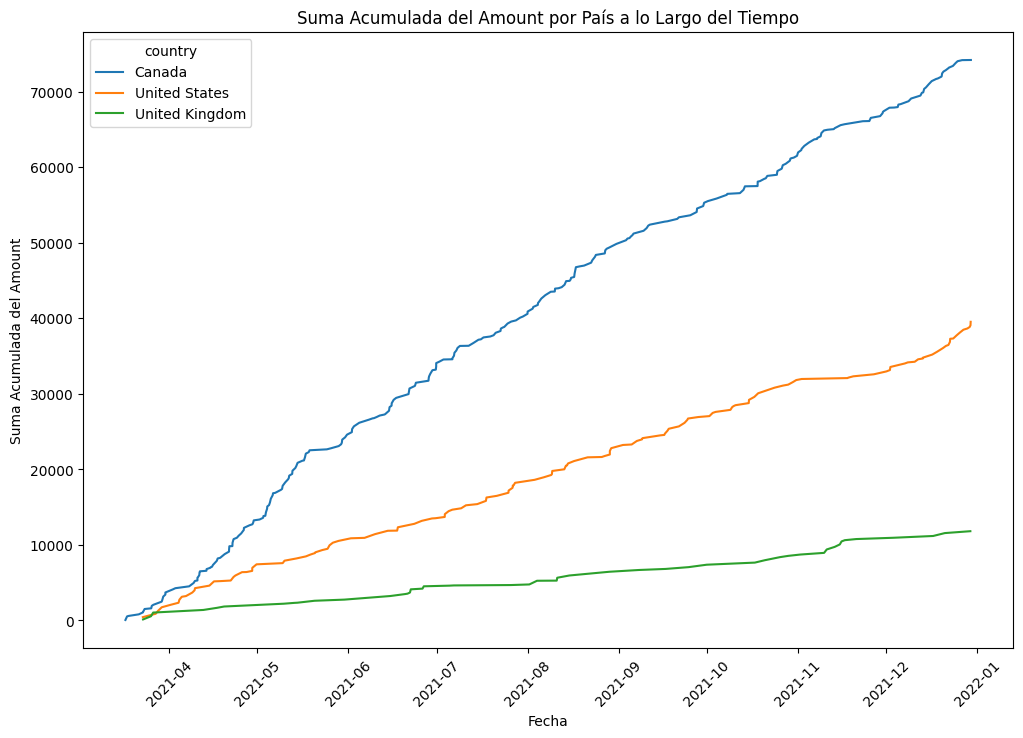

In [11]:
df_general['timestamp'] = pd.to_datetime(df_general['timestamp'])
df_general = df_general.sort_values(by='timestamp')


df_general['amount_cumsum'] = df_general.groupby('country')['amount'].cumsum()

fecha_inicio = '2021-1-1'
fecha_fin = '2021-12-31'


df_filtrado_fecha = df_general.loc[(df_general['timestamp'] >= fecha_inicio) & (df_general['timestamp'] <= fecha_fin)]


plt.figure(figsize=(12, 8))
sns.lineplot(data=df_filtrado_fecha, x='timestamp', y='amount_cumsum', hue='country')


plt.title('Suma Acumulada del Amount por País a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Suma Acumulada del Amount')
plt.xticks(rotation=45)


plt.show()




Podemos observar que como bien sabemos la cantidad de usuarios de Canadá que era la mitad de EEUU, pero sin embargo Canadá, gasta mucho más, casi el doble.

UK sin embargo está muy lejos de ambos países, dándonos a entender que hay que mejorar con los usuarios de este pais.

Este gráfico nos puede dar a entender que para los usuarios canadienses podemos tomar decisiones cobre conservar clientes y mantener la calidad y en los usuarios de uk podemos potenciar las campañas de marketing para captación de cliente, así como estudiar porque no interesa el producto que vendemos. Algo similar a estados unidos ya que sabemos que son nuestro mayor número de clientes sin embargo no gastan tanto, por lo que podemos estudiar cómo mejorar esta situación.


### Ex07 - Graficar un Pairplot.

Para hacer este pairplot con seaborn "sns.pairplot" He decidido usar las columnas "amount, edad_usuario, cantidad_productos, rango_edad" con tal de ver las distribuciones entre estas variables.

Todo esto estará filtrado por el pais de Canadá para conocer los datos de estos usuarios

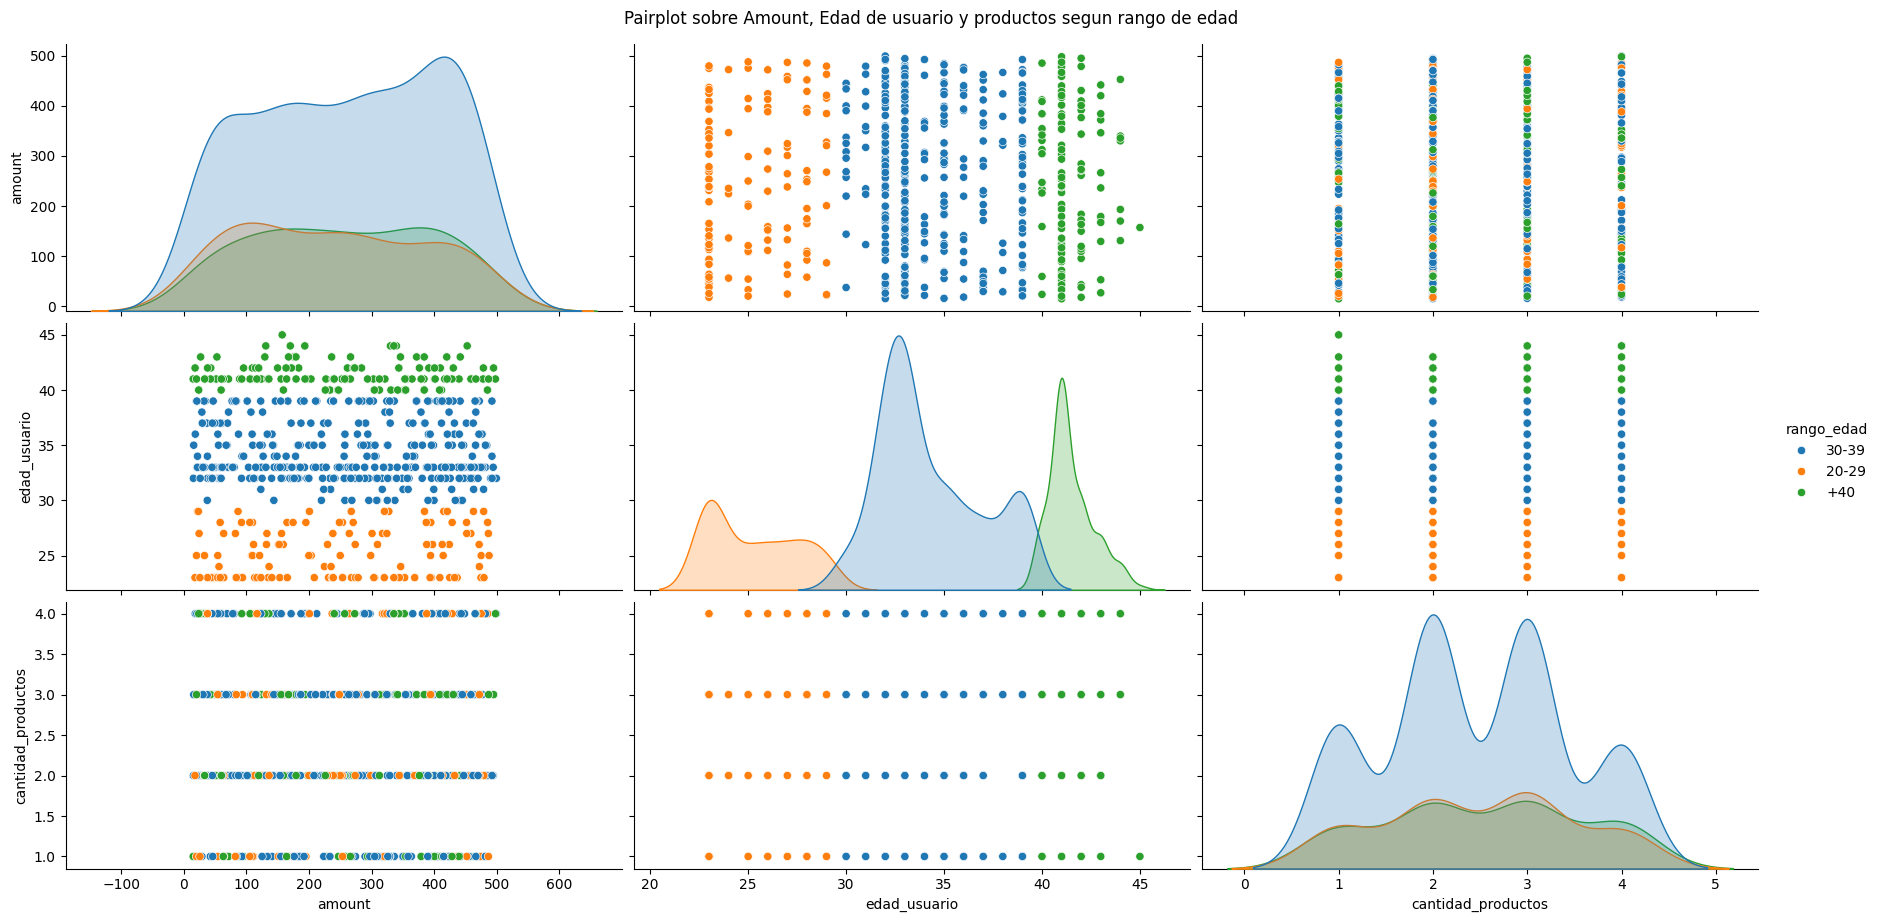

In [12]:

pais_filtrado = "Canada"

df_filtrado_pais = df_general.loc[(df_general['country'] == pais_filtrado)]

selected_columns = ['amount', 'edad_usuario', 'cantidad_productos',"rango_edad"]


sns.pairplot(df_general[selected_columns],height=3,aspect=2, hue="rango_edad")
plt.suptitle('Pairplot sobre Amount, Edad de usuario y productos segun rango de edad', y=1.02)
plt.show()


aquí podemos ver las relaciones entre las variables de edad del usuario, el valor de la transacción y la cantidad de productos comprados por transacción.

En este caso lo hemos filtrado por los datos de los usuarios de Canadá, separando los datos por rangos de edad (20-29, 30-39, +40)

A simple vista y como ya sabemos el mercado está dominado por los usuarios de Canadá donde vemos que sus datos indican que suelen comprar dos o tres productos mayoritariamente. Además, añadimos que la gran mayoria de usuarios se encuentran entre los 30-39 podemos valorar que tipos de productos mejorar, u ofertas ofrecerles. Y siguiendo la tendencia este mismo grupo es el que más dinero gasta en las transacciones. Los datos lo siguen el grupo de 20-29 y por último 40+.

Aun así, hay gráficos que aún no son del todo claros como el de amount por cantidad de productos, que realmente es muy pobre visualmente y se podría obviar o mejorar.


## Nivel 2

### Ex01 - Correlació de totes les variables numèriques.

Para este ejercicio primero tendremos que crear un df más grande uniendo las temas tablas con tal de obtener más datos numéricos, en nuestro caso uniremos las tablas "transactions","user" y "companies"(recordando que .merge para hacer el join de estas)

Una vez hecho esto tendremos que extraer únicamente los valores numéricos (float e int) para ello sobre una nueva variable (numerico_df en este caso) le asignamos nuestro anterior df usando ".select_dtypes" para seleccionar solo el tipo de datos que queramos, en este caso "(include=['float64', 'int64'])" para los floats y integer.

Además, en mi caso creí que era conveniente eliminar todas las columnas que fueran ids ya que no creo que proporcionaran ningún tipo de interés y solo añadirían ruido.

Una vez tratado todos estos datos, creamos la matriz de correlación usando el método .corr() y posteriormente creamos la visualización con seabron con un heatmap donde, con tal de hacerlo más claro, añadiremos los parámetros "cmap=coolwarm" para que sea más intuitivo ( a la vista ) las correlaciones, además de usar fmt='.2f' para redondear los resultados.


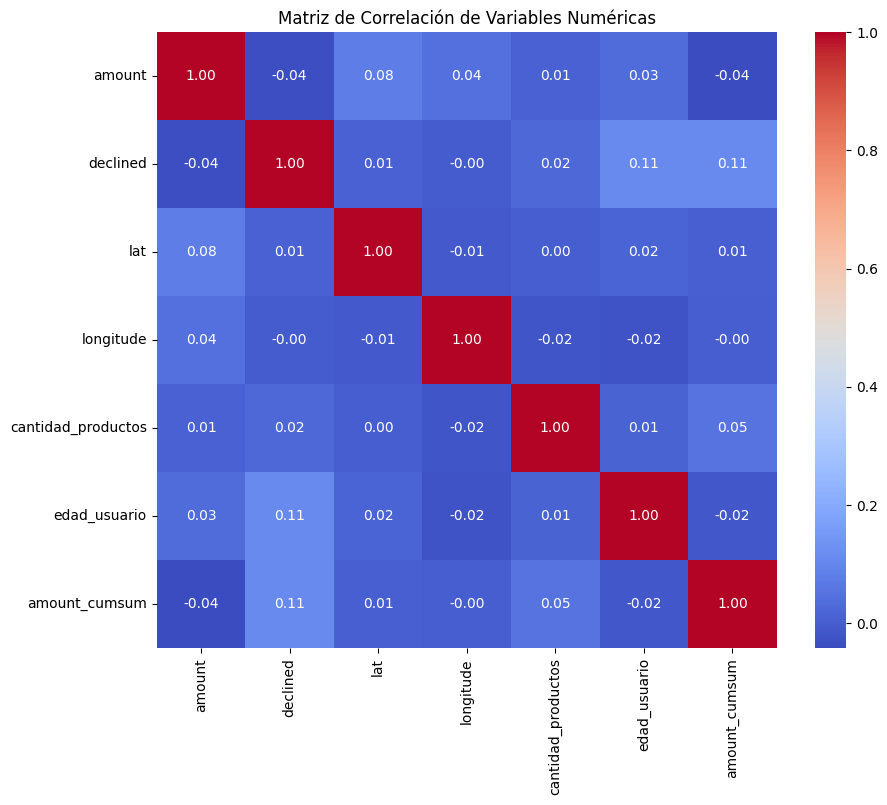

In [13]:

df_correlacion = df_general



numerico_df = df_correlacion.select_dtypes(include=['float64', 'int64'])
numerico_df = numerico_df.drop(columns=['id_x', 'id_y', 'user_id', 'id_user'], errors='ignore')
matriz = numerico_df.corr()





plt.figure(figsize=(10, 8))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()


Después de analizar el heatmap sobre la matriz de correlación de las variables numéricas, vemos que no hay ninguna variable que este relaciona con ninguna otra. Por lo que no nos sirve para sacar una conclusión ni predicciones.

### Ex02 - Implementa un jointplot.

Volvemos a requerir de la función Merge para crear nuestro dataframe deseado. y usaremos seaborn para hacer el jointplot

En nuestro caso usaremos las columnas "edad_usuario" y "amount"

Adicionalmente añadiremos una línea de tendencia



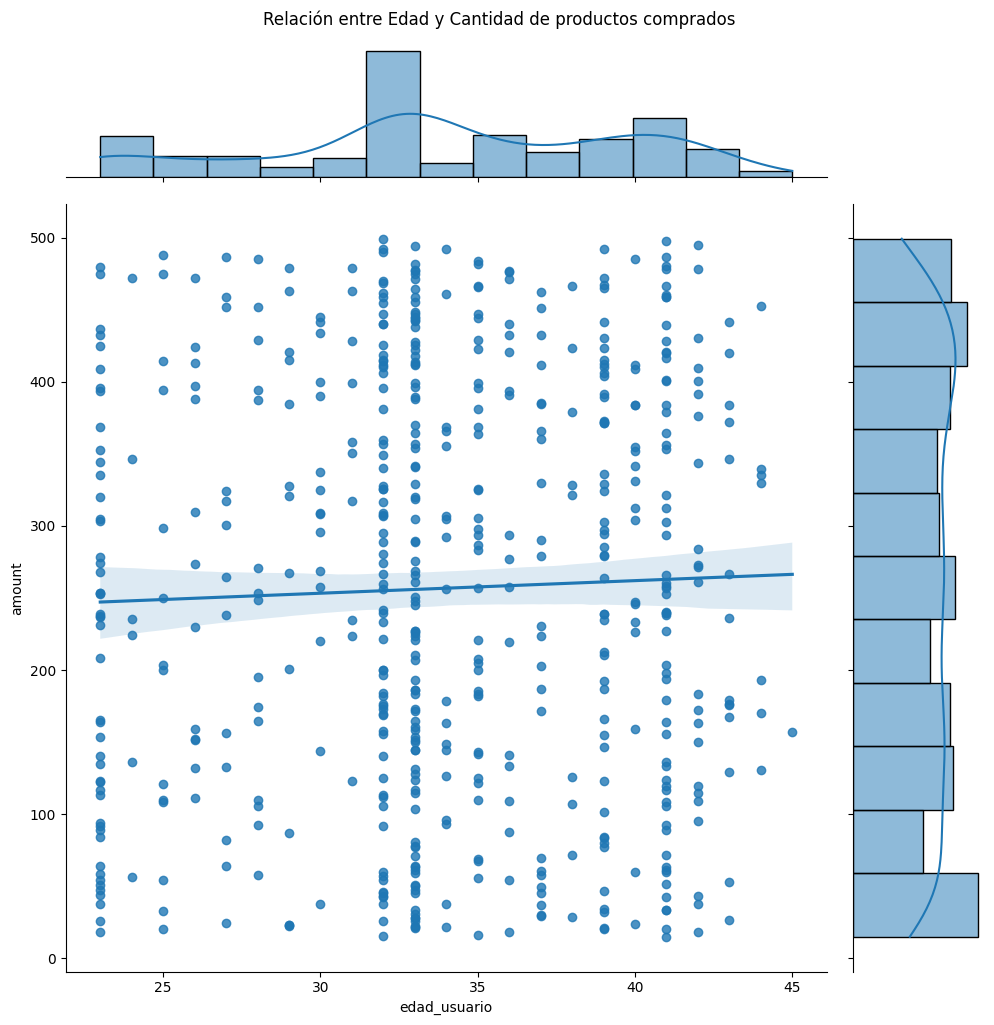

In [14]:
sns.jointplot(x='edad_usuario', y='amount', data=df_general, kind='reg', height=10)


plt.suptitle('Relación entre Edad y Cantidad de productos comprados', y=1.02)


plt.show()

En este caso podemos observar cómo los usuarios de entre 32-23n años han hecho la mayor cantidad de operaciones entre los demás, seguida por los 41-42 y por último como top tres alrededor de los 37.

Esto nos indica que los usuarios más jóvenes no suelen hacer muchas transacciones comparado con la franja de 30-40 que parecen más interesados en los productos. Esto nos indica que rango debemos potenciar.

Así mismo vemos como la mayoria de transacciones son por montos pequeños (inferior a 80) sin embargo también indica que crecen alrededor del rango de los 400


## Nivel 3

### Ex01 - Implementa un violinplot combinat amb un altre tipus de gràfic.

Aquí con tal de conocer la población a traves de diferentes montos. En este caso hemos decidido filtrar sobre sobre el rango de edad de 30-40 que es los que vemos que más interesados están.

Volvemos a requerir un merge entre transactions y user con tal de poder usar "edad_usuario" y "amount"
Creamos dos variables para filtrar la edad deseada, en este caso entre 20-30

Crearemos dos gráficos, uno de violín y otro de dispersión, y a traves de matplot "plt.subplots" indicamos que serán dos gráficos superpuestos.


C:\Users\Arkim\AppData\Local\Temp\ipykernel_29244\2142154517.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




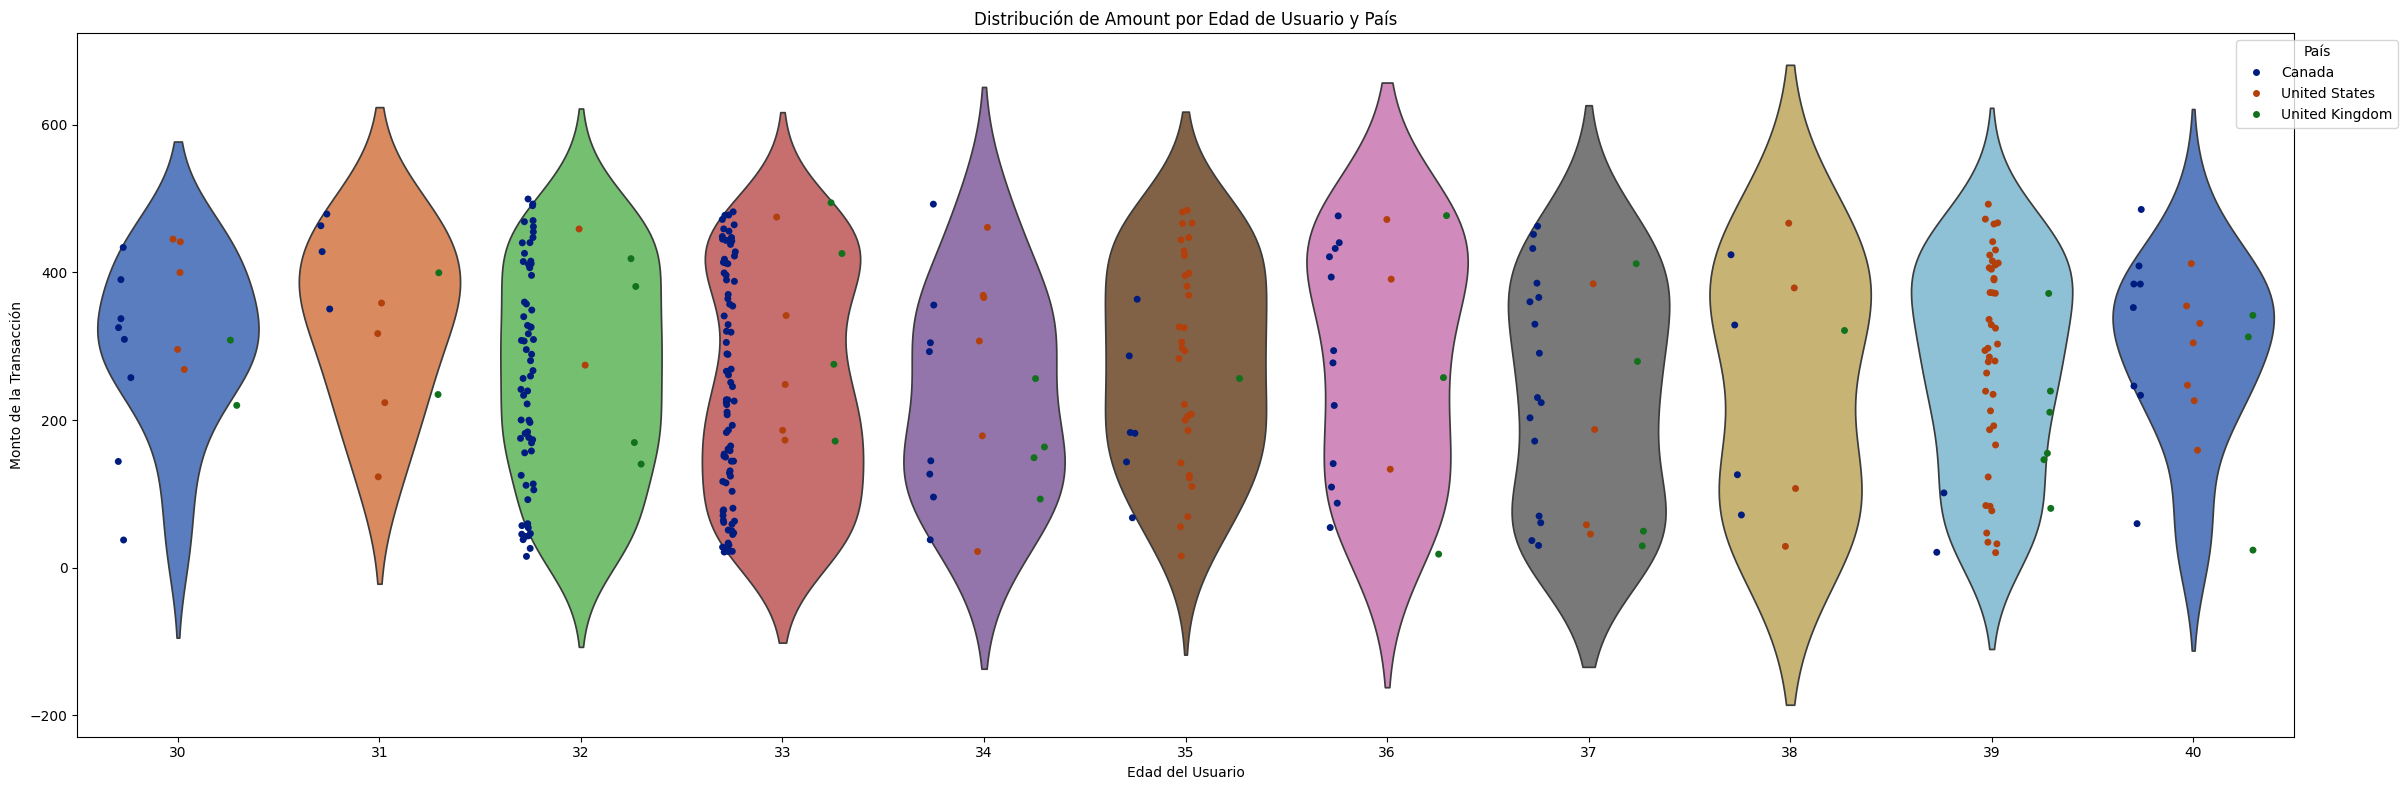

In [15]:
edad_inicio = 30
edad_fin = 40


df_filtrado_edad = df_general.loc[(df_general['edad_usuario'] >= edad_inicio) & (df_general['edad_usuario'] <= edad_fin)]


fig, ax = plt.subplots(figsize=(24, 8))


sns.violinplot(x='edad_usuario', y='amount', data=df_filtrado_edad, inner=None, ax=ax, palette='muted')


sns.stripplot(x='edad_usuario', y='amount', hue='country', data=df_filtrado_edad, dodge=True, ax=ax, palette='dark')


ax.set_title('Distribución de Amount por Edad de Usuario y País')
ax.set_xlabel('Edad del Usuario')
ax.set_ylabel('Monto de la Transacción')


plt.legend(title='País', bbox_to_anchor=(1.05, 1))


plt.tight_layout()
plt.show()



Ahora podemos conocer la distribución de los montos según la edad y a la misma vez conocer la población de cada pais en estos rangos.

podemos ver a simple vista que Canadá tiene dos grandes grupos de usuarios en los 32 y 33 años, donde estos rangos la mediana está cerca de los 250-300.

En este mismo rango de edad los usuarios de UK no son relevantes con muy poca participación.

En los estados unidos los usuarios están más concentrados en los 35 y 39 años, con una mediana de 300 aproximadamente.

Con este gráfico podemos confirmar lo que ya sabemos sobre los usuarios que rondan los 30-40 años además de proporcionarnos un detalle más claro de cuanto gastan y sus medidas por edad.




### Ex02 - Genera un FacetGrid per a visualitzar múltiples aspectes de les dades simultàniament.

Para hacer el facetgrid usaremos su metodo de seaborn. Usando las variables "country_company","country"(usuario) "amount" y cantidad_productos
con tal de ver las ventas de cada compañia, distribuidas por el amount y filtrando por el pais de usuario.

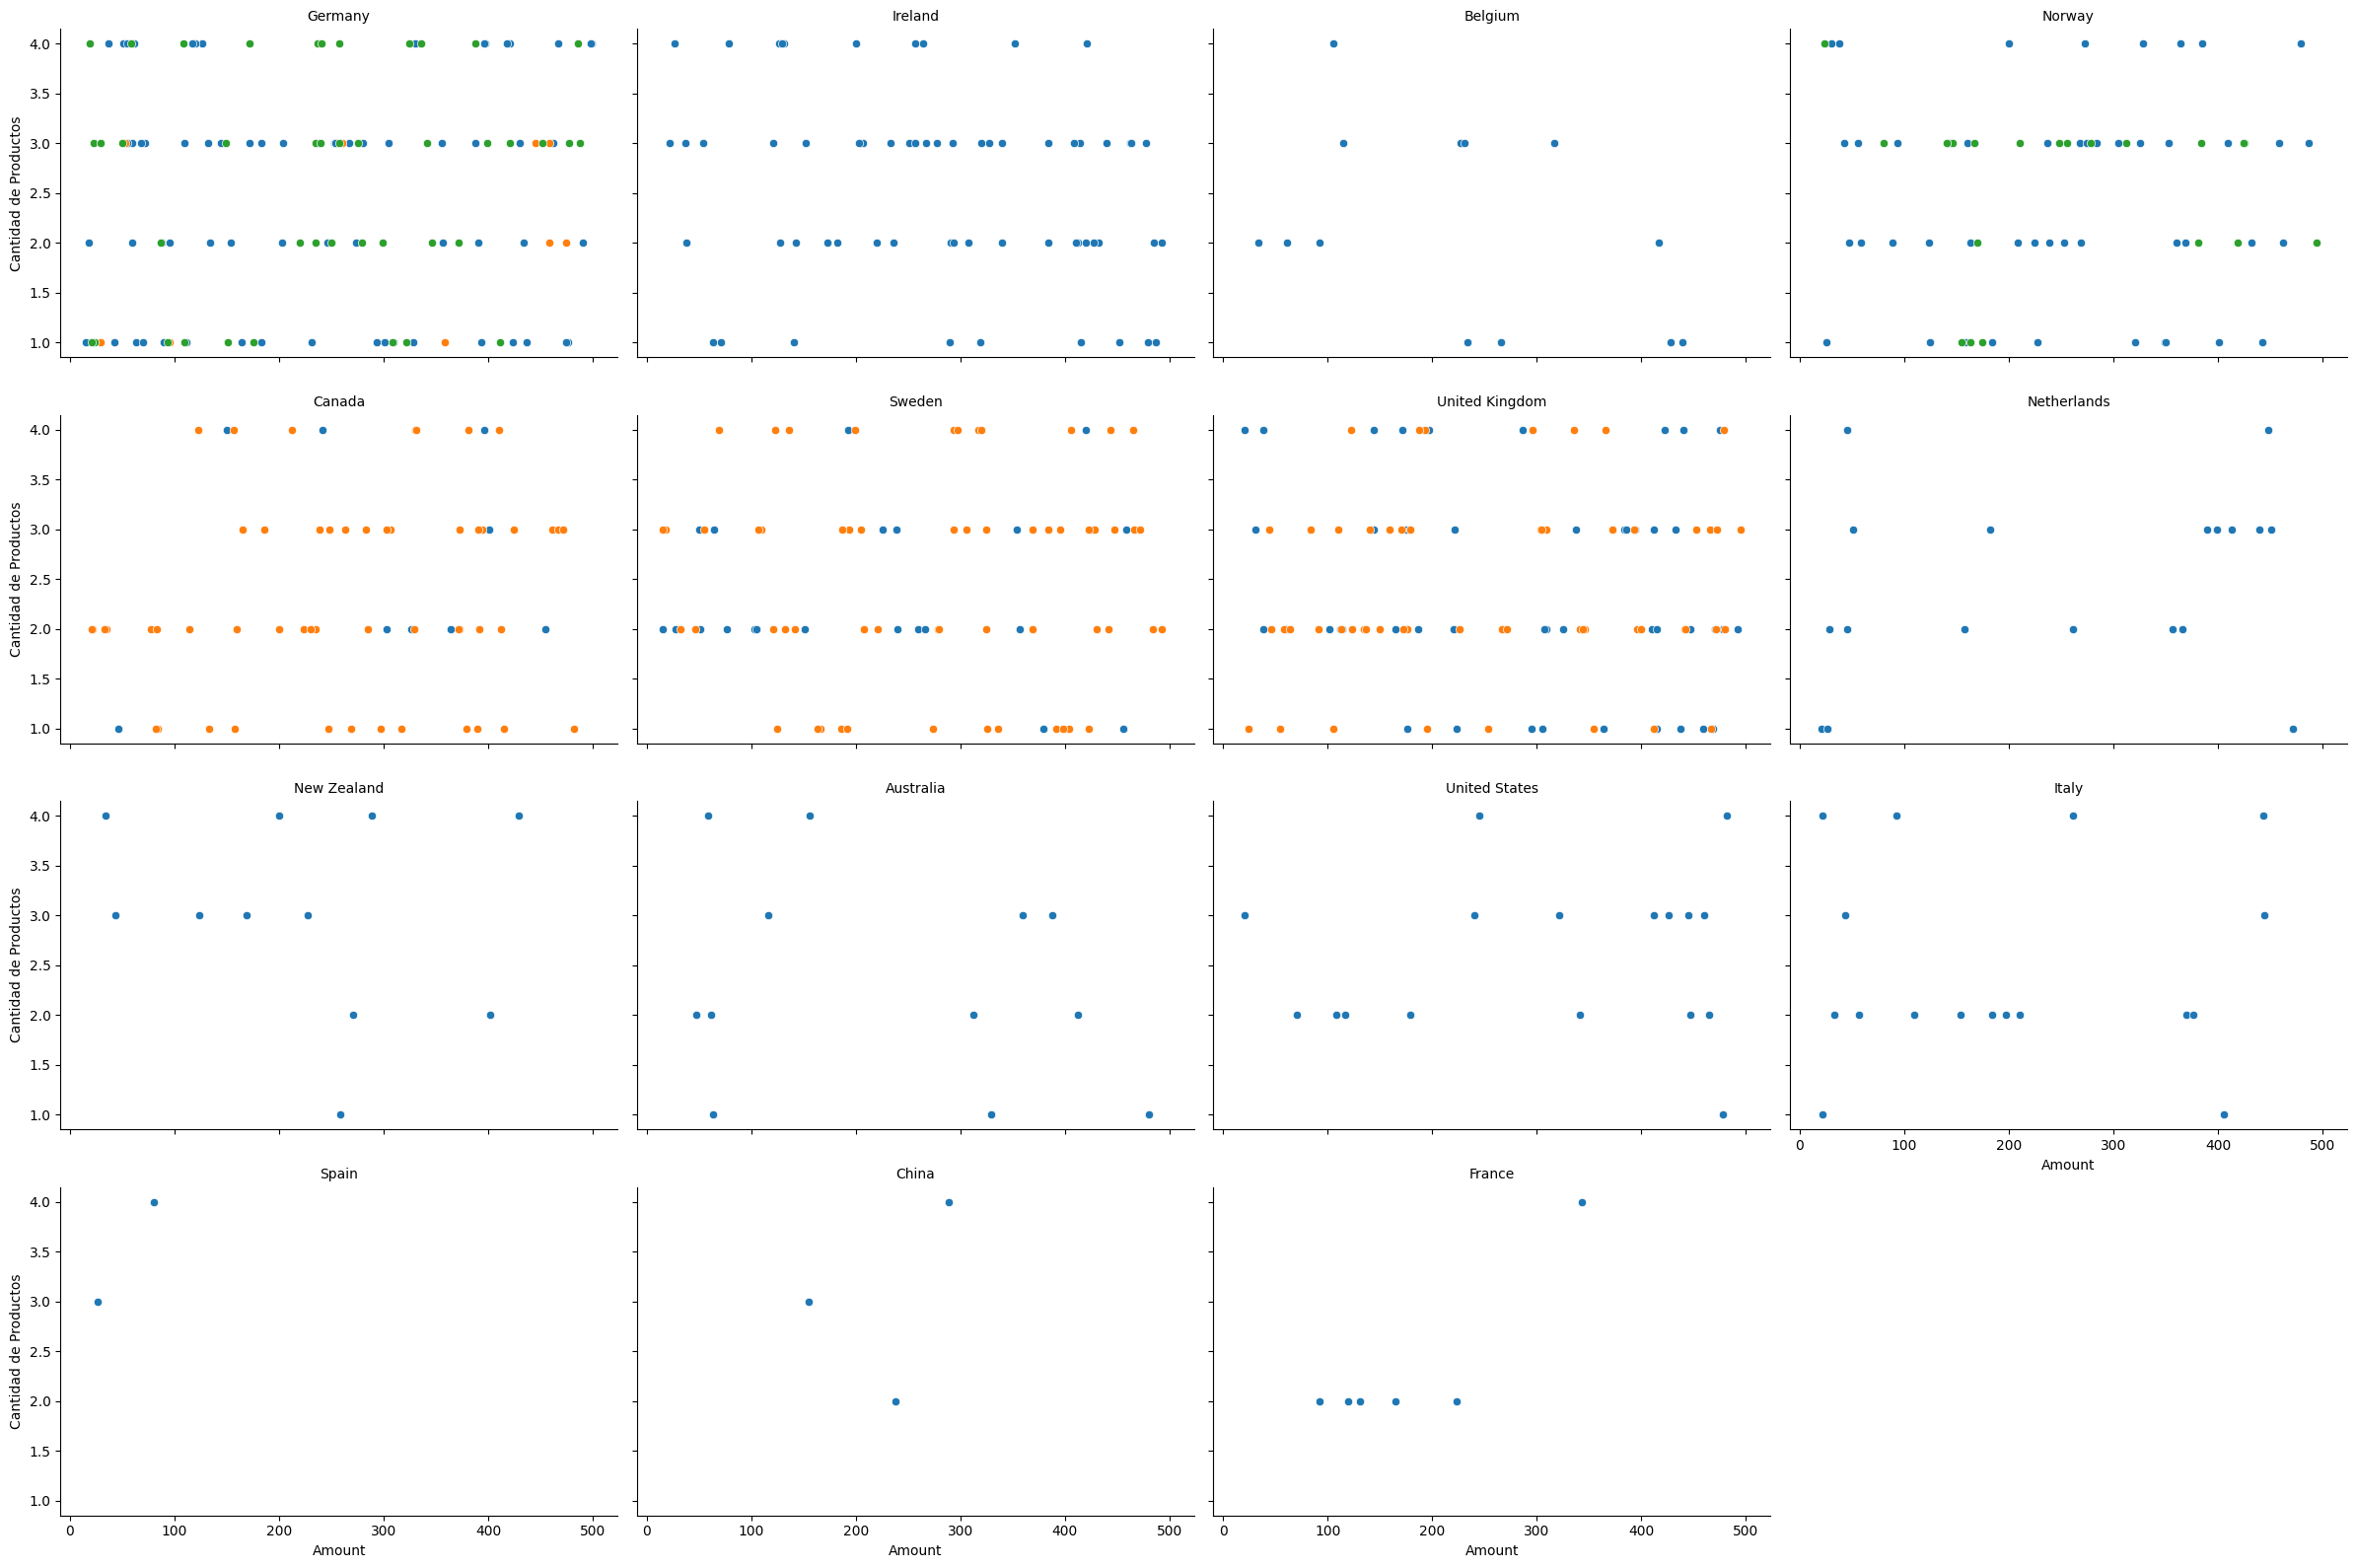

In [16]:


g = sns.FacetGrid(df_general, col="country_company", hue="country",col_wrap=4, height=4, aspect=1.5)
g.map_dataframe(sns.scatterplot, x="amount", y="cantidad_productos")

g.set_axis_labels("Amount", "Cantidad de Productos")
g.set_titles("{col_name}")


plt.show()

Aqui rapidamente podemos ver que las compañias de Irlanda, Belgica, Holanda, Nueva Zelanda, Australia, EEUU, Italia, España, China y Francia solo tienen ventas a usuarios de EEUU.

Por otro lado los usuarios de Canada solo hacen sus compran con las compañias de Noruega y Alemania. Y por último los de Reino Unido solo hacen sus compras en compañias de UK, Suecia y Canada.

Además esta visualización nos otorga detalle de cuantos productos venden estas compañias y su distribución sobre el valor de la transacción


Un ejemplo del valor que nos dá sería como gestionar los recursos en las compañias  (potenciar o cerrar mercados)